In [26]:
%load_ext autoreload
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

import pandas as pd

import sncosmo
import gedankenLSST
import seaborn as sns
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from lsst.sims.photUtils import BandpassDict

In [28]:
lsst_bp = BandpassDict.loadTotalBandpassesFromFiles()

In [29]:
# sncosmo Bandpasses required for fitting
throughputsdir = os.getenv('THROUGHPUTS_DIR')

from astropy.units import Unit
bandPassList = ['u', 'g', 'r', 'i', 'z', 'y']
banddir = os.path.join(os.getenv('THROUGHPUTS_DIR'), 'baseline')

for band in bandPassList:

    # setup sncosmo bandpasses
    bandfname = banddir + "/total_" + band + '.dat'


    # register the LSST bands to the SNCosmo registry
    # Not needed for LSST, but useful to compare independent codes
    # Usually the next two lines can be merged,
    # but there is an astropy bug currently which affects only OSX.
    numpyband = np.loadtxt(bandfname)
    print band
    sncosmoband = sncosmo.Bandpass(wave=numpyband[:, 0],
                                   trans=numpyband[:, 1],
                                   wave_unit=Unit('nm'),
                                   name=band)
    sncosmo.registry.register(sncosmoband, force=True)

u
g
r
i
z
y


In [ ]:
# Expected number of galaxies in Twinkles area

In [14]:
# Galaxies with z < 1.2
galaxyBase = pd.read_csv('/Users/rbiswas/doc/projects/supernovae/LSST/sgi/src/fatboy_galaxyBase.csv')

In [15]:
zmids = 0.5 * (galaxyBase['minz'] + galaxyBase['maxz'])
numGals = galaxyBase['numGals']* (10./60./ 4.0)**2
# Total number of galaxies
numGals.sum()

7387.4027777777774

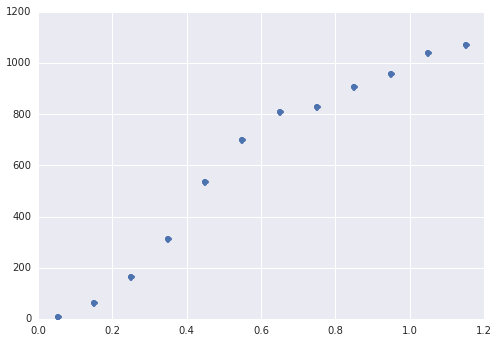

In [16]:
fig, ax = plt.subplots()
ax.plot(zmids,numGals ,'o')

##  SN Light Curve (standard)

In [17]:
lsstchar = gedankenLSST.LSSTReq

In [18]:
lsstchar['meanNumVisits'] = pd.Series(np.repeat(3650.,6), index=['u','g','r','i','z','y'])

In [19]:
lsstchar['meanNumVisits']

u    3650
g    3650
r    3650
i    3650
z    3650
y    3650
dtype: float64

In [20]:
sn = gedankenLSST.GSN_Obs(mjd_center=49530., lsstrequirements=lsstchar)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c8f61d0>]], dtype=object)

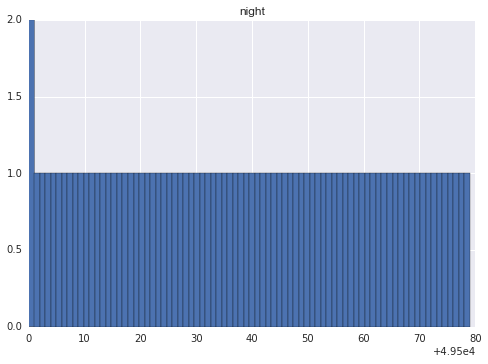

In [21]:
df = sn.summary
df[df['filter'] == 'u'].hist('night',bins=80)

In [30]:
s = gedankenLSST.SNObs(summarydf=df, t0=49530, lsst_bp=lsst_bp)

In [55]:
a = []
for z in zmids.values:
    s.snState = {'z': z}
    lc = s.lightcurve
    totalEpochs = len(lc)
    highSNRlc = lc.query('SNR > 5')
    highSNREpochs = len(highSNRlc)
    highSNREpochs_u = len(highSNRlc.query("filter == 'u'"))
    highSNREpochs_g = len(highSNRlc.query("filter == 'g'"))
    highSNREpochs_r = len(highSNRlc.query("filter == 'r'"))
    highSNREpochs_i = len(highSNRlc.query("filter == 'i'"))
    highSNREpochs_z = len(highSNRlc.query("filter == 'z'"))
    highSNREpochs_y = len(highSNRlc.query("filter == 'y'"))
    
    a.append([z, highSNREpochs, highSNREpochs_u, highSNREpochs_g, highSNREpochs_r, highSNREpochs_i, highSNREpochs_z,
              highSNREpochs_y, totalEpochs, -2.5 * np.log10(s.SN.get('x0'))])

426
438
450
462
474
480
480
480
480
480
480
480


In [70]:
clear(df)

In [76]:
df = pd.DataFrame(a, columns=['redshift', 'highSNREpochs', 'u', 'g', 'r', 'i', 'z', 'y', 'totalEpochs', 'mB'])

In [108]:
df['frac'] = df.highSNREpochs / df.totalEpochs

In [112]:
df['NumSNperzBin'] = 10 * 3650. / 80. / df.frac

In [114]:
df['numGals'] = numGals

In [116]:
df['SNperGals'] = df['NumSNperzBin'] / df['numGals']

In [117]:
df

,redshift,highSNREpochs,u,g,r,i,z,y,totalEpochs,mB,frac,NumSNperzBin,numGals,SNperGals
0,0.053143,409,66,70,70,70,66,67,416,7.094272,0.983173,464.058680,7.625000,60.860155
1,0.150008,376,38,68,70,69,68,63,424,9.490603,0.886792,514.494681,61.906250,8.310868
2,0.250001,310,17,69,70,69,68,17,436,10.728756,0.711009,641.693548,163.303819,3.929446
3,0.350000,252,0,51,70,69,62,0,438,11.572598,0.575342,793.005952,311.149306,2.548635
4,0.450000,197,0,37,58,61,41,0,443,12.218192,0.444695,1025.983503,536.333333,1.912959
5,0.550001,144,0,23,47,45,29,0,445,12.742535,0.323596,1409.939236,699.105903,2.016775
6,0.650000,75,0,0,40,35,0,0,449,13.184283,0.167038,2731.416667,809.276042,3.375136
7,0.750000,56,0,0,26,30,0,0,452,13.565827,0.123894,3682.589286,827.456597,4.450492
8,0.850000,22,0,0,6,16,0,0,444,13.901398,0.049550,9207.954545,905.715278,10.166500
9,0.950000,0,0,0,0,0,0,0,432,14.200651,0.000000,inf,955.685764,inf


In [118]:
df.to_csv('Twinkles_roughPlan.csv')

###  Check cosmology (WMAP9)

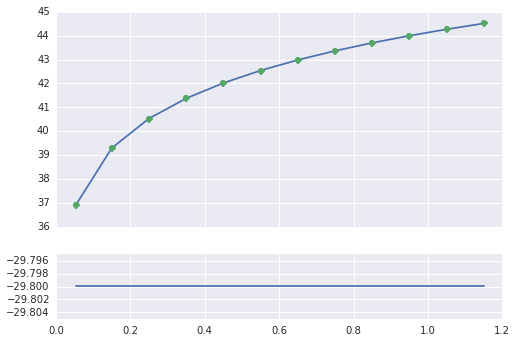

In [107]:
fig, ax, ay = pu.settwopanel(setdifflimits=(-29.805, -29.795))
ay.plot(df.redshift, df.mB - cosmo.distmod(df.redshift.values).value)
ax.plot(df.redshift, cosmo.distmod(df.redshift.values).value)
ax.plot(df.redshift, df.mB +29.8, 'o')